Cargar el dataset FuelConsumptionCo2.csv en numpy

lo habitual es cargarlo con pandas

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

import random
import pickle as pkl

In [36]:
with open("../Data/FUELCONSUMPTION_CITY.pkl", "br") as f:
    city_consumption = pkl.load(f)
    
city_consumption

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [37]:
print(city_consumption.dtype)

float64


In [38]:

# Cargamos la columna 8 del CSV en un array de numpy: es la columna de consumo de combustible por ciudad
# city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1) # float64
city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)

city_consumption
road_consumption

array([ 6.7,  7.7,  5.8, ...,  9.8,  9.3, 10.2],
      shape=(1067,), dtype=float32)

In [39]:
print(city_consumption.dtype)
print(city_consumption.shape)

float32
(1067,)


In [40]:
manufacturers = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

In [41]:
print(manufacturers.dtype)
print(manufacturers.shape)

<U13
(1067,)


In [42]:
print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en carretera: {np.mean(road_consumption)}")



print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2)}")
print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2)}")


print(f"Consumo medio en ciudad: {np.mean(city_consumption)}")
print(f"Consumo medio en ciudad: {np.around(np.mean(city_consumption), 2):.2f}")
print(f"Consumo medio en ciudad: {round(np.mean(city_consumption), 2):.2f}")

Consumo medio en ciudad: 13.29653263092041
Consumo medio en carretera: 9.474601745605469
Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 13.300000190734863
Consumo medio en ciudad: 13.300000190734863
Consumo medio en ciudad: 13.29653263092041
Consumo medio en ciudad: 13.30
Consumo medio en ciudad: 13.30


In [43]:
print(f"Mediana de combustible en ciudad: {np.median(city_consumption)}")
print(f"Mediana de combustible en carretera: {np.median(road_consumption)}")



Mediana de combustible en ciudad: 12.600000381469727
Mediana de combustible en carretera: 8.800000190734863


In [45]:
print(f"Coche que más combustible consume en ciudad: {np.max(city_consumption)}")
print(f"Coche que más combustible consume en carretera: {np.max(road_consumption)}")




Coche que más combustible consume en ciudad: 30.200000762939453
Coche que más combustible consume en carretera: 20.5


In [47]:
print(f"Coche que menos combustible consume en ciudad: {np.min(city_consumption)}")
print(f"Coche que menos combustible consume en carretera: {np.min(road_consumption)}")



Coche que menos combustible consume en ciudad: 4.599999904632568
Coche que menos combustible consume en carretera: 4.900000095367432


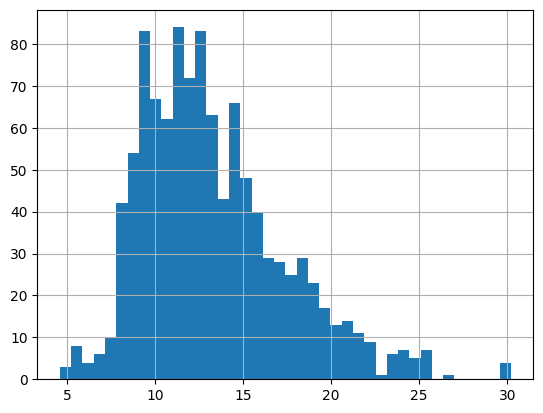

In [48]:
plt.hist(city_consumption, bins=40);
plt.grid()

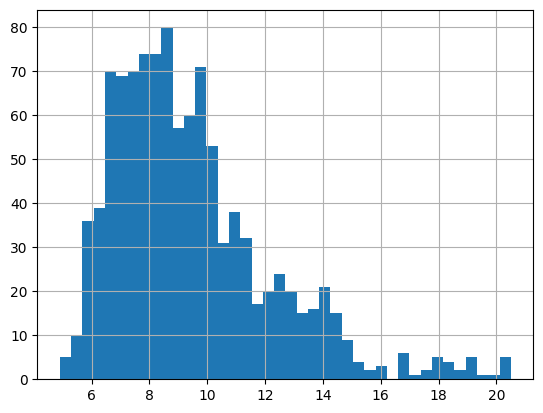

In [49]:
plt.hist(road_consumption, bins=40);
plt.grid()

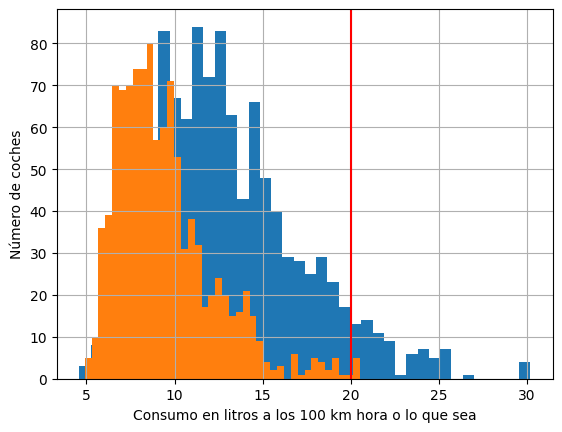

In [50]:
plt.hist(city_consumption, bins=40);
plt.hist(road_consumption, bins=40);
plt.xlabel("Consumo en litros a los 100 km hora o lo que sea")
plt.ylabel("Número de coches")
plt.axvline(20, color='red') # limite de compra 
plt.grid()

In [51]:

print(np.quantile(a = city_consumption, 
            q = 0.5,   # 50% === mediana sirve para calcular valores anómalos
            interpolation = "lower"))

print(np.median(city_consumption))



12.6
12.6


In [52]:
print(np.quantile(a = city_consumption, 
            q = [0.25, 0.50, 0.75],
            interpolation = "lower"))

# primer quartil (Q1): 10.2 L/ 100 km - El 25% de los coches consumen menos de 10,2 litros
# Mediana (Q2): 12,6 L / 100 km - El 50% de los coches consumen menos de 12,6 litros
# Tercer cuartil (Q3): 15,5 L / 100 km - El 75% de los coches consumen menos de 15,5 litros
# Esto nos intereasa para poder detectar calores anómalis o que están muy alejados del 50% de los datos


[10.2 12.6 15.5]


In [53]:
# np.where
# Filtros: máscara booleana
city_consumption[city_consumption >= 26]
# df[df["city_consumption"] >= 26]

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [54]:
# rango
print(f"Rango consumo ciudad: {np.max(city_consumption) - np.min(city_consumption)}")
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(city_consumption)}")


Rango consumo ciudad: 25.600000381469727
Rango consumo carretera: 15.899999618530273


In [55]:
# rango intercuartilico IQR: am,plitud entre el primer cuartil (Q1) y el tercer quartil (Q3): Vemos la variabilidad central de los datos
# lo usaremos para calcular valores que sean anómalos, que están myuy alejados de ese 50% central de los datos
# como están distribuidos los datos alrededor de la mediana
# 1.5 veces el IQR alejado se puede considerar un outlier o 
print(np.quantile(a = city_consumption, q = [0.25], interpolation = "lower"))
print(np.quantile(a = city_consumption, q = [0.50], interpolation = "lower"))
print(np.quantile(a = city_consumption, q = [0.75], interpolation = "lower"))

Q1 = np.quantile(a = city_consumption, q = [0.25], interpolation = "lower")
Q2 = np.quantile(a = city_consumption, q = [0.50], interpolation = "lower")
Q3 = np.quantile(a = city_consumption, q = [0.75], interpolation = "lower")

IQR = Q3 - Q1
print(IQR)

# def remove_outliers(array):
    

[10.2]
[12.6]
[15.5]
[5.3]


10.2
15.5


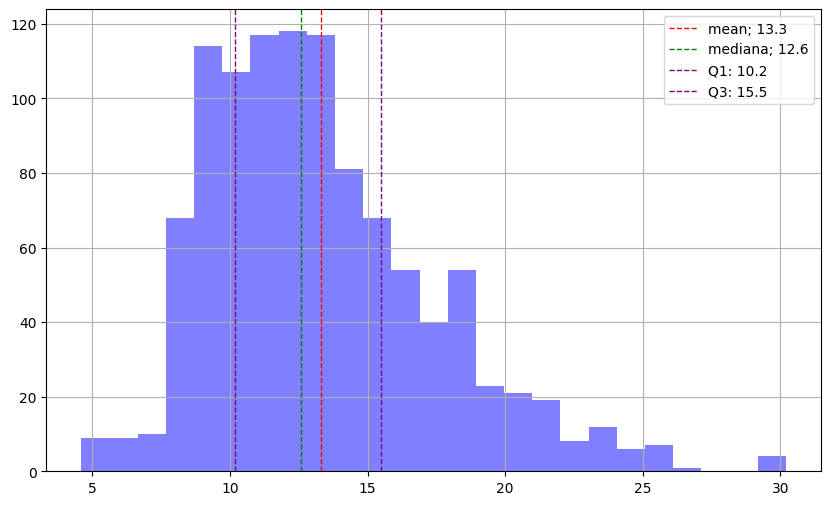

In [56]:
# pintar media, mediana, q1, q3, min, max en un histograma


city_mean = np.mean(city_consumption)
city_median = np.median(city_consumption)
city_min = np.min(city_consumption)
city_max = np.max(city_consumption)
city_q1 = np.quantile(a = city_consumption, q = 0.25, interpolation = "lower")
city_q3 = np.quantile(a = city_consumption, q = 0.75, interpolation = "lower")
print(city_q1)
print(city_q3)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=25, color='blue', alpha=0.5)
plt.axvline(city_mean, color='red', linestyle='dashed', linewidth=1, label=f'mean; {city_mean:.1f}')
plt.axvline(city_median, color='green', linestyle='dashed', linewidth=1, label=f'mediana; {city_median:.1f}')
#plt.axvline(city_min, color='black', linestyle='dashed', linewidth=1, label=f'min; {city_min:.1f}')
#plt.axvline(city_max, color='black', linestyle='dashed', linewidth=1, label=f'max; {city_max:.1f}')
plt.axvline(city_q1, color='purple', linestyle='dashed', linewidth=1, label=f'Q1: {city_q1:.1f}')
plt.axvline(city_q3, color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {city_q3:.1f}')
plt.legend()
plt.grid()
plt.show()





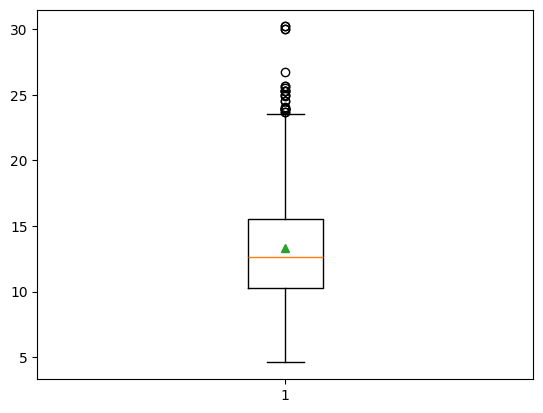

In [57]:
# boxplot
# punto y coma se pone al final para evitar que muestre textos encima del grafico, solo cuando es la ultima linea de la celda (y solo para Jupyter)
plt.boxplot(city_consumption, showmeans=True);

In [58]:
# Filtrar usando percentiles
#distintos medios (alias) de hacer lo mismo
#print(np.quantile(city_consumption, 0.5))
#print(np.percentile(city_consumption, 50))

# filtramos un porcentaje de los coches
percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil_10: {percentil_10}")
print(f"percentil_90: {percentil_90}")


#Coches en el 10% inferior (10% de coches que menos consumen)
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]

# 10% de coches que más consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
print(coches_menor_consumo.shape)
print(f"media: {np.mean(coches_menor_consumo)}")
print("10 % coches mayor consumo")
print(coches_mayor_consumo.shape)
print(f"media: {np.mean(coches_mayor_consumo)}")



percentil_10: 8.699999809265137
percentil_90: 18.799999237060547
10 % coches menor consumo
(114,)
media: 7.8307013511657715
10 % coches mayor consumo
(115,)
media: 21.574783325195312


In [59]:
# Varianza: mide la dispersion de los consumos con respecto a la media
np.var(city_consumption)

np.float32(16.804516)

In [60]:
# desviacion estandar: raiz cuadrada de la varianza, permite una mejor interpretación ya que estaría en las mismas unidades

np.std(city_consumption)
# de media, los consumops se desvian 4,1 litros de la media 

np.float32(4.0993314)

In [61]:
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

In [62]:
from collections import Counter
contador = Counter(manufacturers) # obtenemos como un diccionario

# contador.most_common(5)  # da los 5 fabricantes de coches más comunes en este dataset
top_10 = contador.most_common(10)
for fabricante, count in top_10:
    print(f"Fabricante {fabricante} tiene {count} coches")

# podemos hacer una grafica con plt.bar
# en pandas sería: sns.countplot()



Fabricante FORD tiene 90 coches
Fabricante CHEVROLET tiene 86 coches
Fabricante BMW tiene 64 coches
Fabricante MERCEDES-BENZ tiene 59 coches
Fabricante AUDI tiene 49 coches
Fabricante GMC tiene 49 coches
Fabricante TOYOTA tiene 49 coches
Fabricante PORSCHE tiene 44 coches
Fabricante VOLKSWAGEN tiene 42 coches
Fabricante DODGE tiene 39 coches


In [63]:
from collections import Counter
contador = Counter(manufacturers)
contador.items()
for i in contador.items():
    print(f"{i[0]} {i[1]}")

#for fabricante, count in contador:
#    print(f"Fabricante {fabricante} tiene {count} coches")
    
for position, vehicle in enumerate(contador.items()):    
    
    if 20 > position > 10:
        print(f"{vehicle[0]} {vehicle[1]}")

ACURA 12
ASTON MARTIN 7
AUDI 49
BENTLEY 8
BMW 64
BUICK 16
CADILLAC 32
CHEVROLET 86
CHRYSLER 19
DODGE 39
FIAT 10
FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3
LAND ROVER 19
LEXUS 22
LINCOLN 11
MASERATI 6
MAZDA 27
MERCEDES-BENZ 59
MINI 36
MITSUBISHI 16
NISSAN 33
PORSCHE 44
RAM 13
ROLLS-ROYCE 7
SCION 9
SMART 2
SRT 2
SUBARU 23
TOYOTA 49
VOLKSWAGEN 42
VOLVO 11
FORD 90
GMC 49
HONDA 21
HYUNDAI 24
INFINITI 21
JAGUAR 22
JEEP 31
KIA 33
LAMBORGHINI 3


In [64]:
top_10

[(np.str_('FORD'), 90),
 (np.str_('CHEVROLET'), 86),
 (np.str_('BMW'), 64),
 (np.str_('MERCEDES-BENZ'), 59),
 (np.str_('AUDI'), 49),
 (np.str_('GMC'), 49),
 (np.str_('TOYOTA'), 49),
 (np.str_('PORSCHE'), 44),
 (np.str_('VOLKSWAGEN'), 42),
 (np.str_('DODGE'), 39)]

In [65]:
# plt.bar()
fabricantes, conteos = zip(*top_10) # tb lo podemos sacar en la celda anterior, dentro del blcle, haciendo append a una lista de cada


print(fabricantes)
print(conteos)


(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


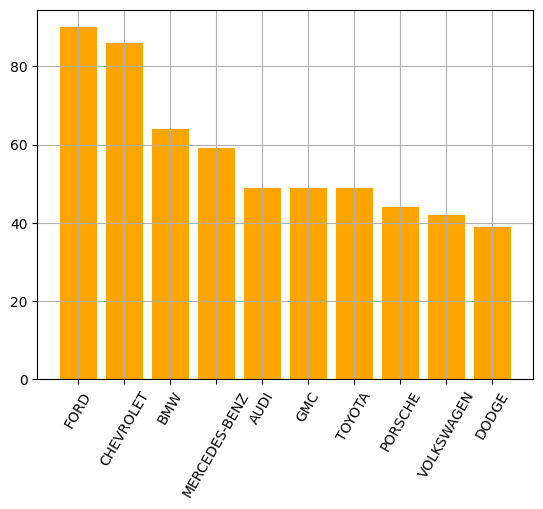

In [66]:
#plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos, color='orange')
plt.xticks(rotation=60);

plt.grid()


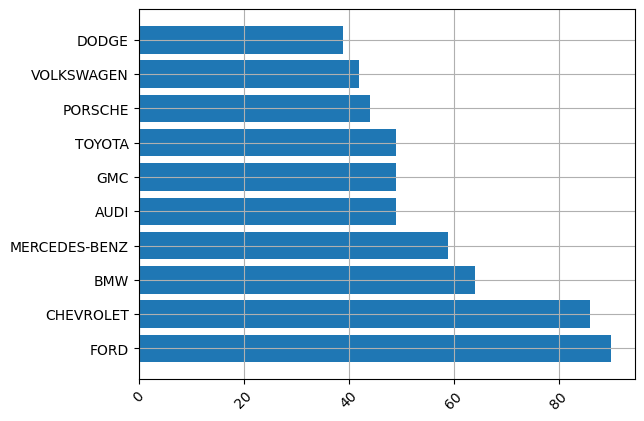

In [67]:
#plt.figure(figsize=(12, 8))
plt.barh(fabricantes, conteos)
plt.xticks(rotation=45);
plt.grid()


In [68]:
# moda de manufacturers
stats.mode(manufacturers)




TypeError: Argument `a` is not recognized as numeric. Support for input that cannot be coerced to a numeric array was deprecated in SciPy 1.9.0 and removed in SciPy 1.11.0. Please consider `np.unique`.

In [69]:
# metodo para ver outliers

def filtrar_outliers(array, k=1.5): # k es el multiplicador del rango intercuartil

    # calcular el Q1
    Q1 = np.percentile(array, 25)
    # calcular el Q3
    Q3 = np.percentile(array, 75)
    # calcular IQR
    IQR = Q3 - Q1
    # Calcular limites inferior y superior: 1.5 veces el IQR
    limite_inferior = Q1 - IQR * k
    # limite_inferior = Q1 - IQR * 1.0 (podemos bajar (acercar al centro) el valor del limite inferior, ya que no tenemos valores por debajo de 5)
    print(f"límite inferior {limite_inferior}")
    
    limite_superior = Q3 + IQR * k
    print(f"límite superior {limite_superior}")

    # Filtro sobre array de 1.5 veces el IQR para limite inferior y limite superior
    array_sin_outliers = array[(array >= limite_inferior) & (array < limite_superior) ]
    # retornar array_filtrado
    return array_sin_outliers

    
    
    
    pass

In [70]:
print(city_consumption.shape) # 1067
filtrados = filtrar_outliers(city_consumption)
city_consumption_sin_outliers = filtrar_outliers(city_consumption)
print(city_consumption_sin_outliers.shape)

(1067,)
límite inferior 2.299999713897705
límite superior 23.5
límite inferior 2.299999713897705
límite superior 23.5
(1039,)


(array([ 3.,  2.,  4.,  3.,  2.,  4.,  4.,  1., 20., 24., 47., 13., 51.,
        45., 44., 35., 37., 44., 51., 41., 39., 49., 45., 33., 34., 38.,
        19., 40., 26., 20., 20., 16., 19., 22.,  9., 16., 22., 20.,  8.,
         9., 10., 11.,  6.,  4.,  9.,  8.,  6.,  3.,  1.,  2.]),
 array([ 4.5999999 ,  4.97399998,  5.34800005,  5.72200012,  6.09599972,
         6.46999979,  6.84399986,  7.21799946,  7.59200001,  7.9659996 ,
         8.34000015,  8.71399975,  9.08799934,  9.46199989,  9.83599949,
        10.20999908, 10.58399963, 10.95800018, 11.33199978, 11.70599937,
        12.07999992, 12.45399952, 12.82799911, 13.20199966, 13.57600021,
        13.94999886, 14.3239994 , 14.69799995, 15.0719986 , 15.44599915,
        15.81999969, 16.19400024, 16.56799889, 16.94199944, 17.31599998,
        17.68999863, 18.06399918, 18.43799973, 18.81199837, 19.18599892,
        19.55999947, 19.93400002, 20.30799866, 20.68199921, 21.05599976,
        21.43000031, 21.80399895, 22.1779995 , 22.55200005,

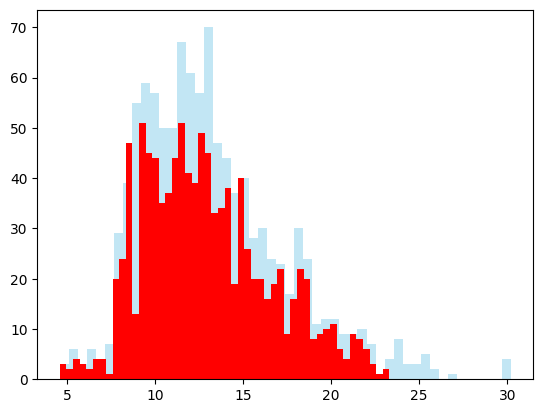

In [71]:
plt.hist(city_consumption, bins = 50, color = "skyblue", alpha = 0.5)
plt.hist(city_consumption_sin_outliers, bins = 50, color = "red")


In [72]:
# crear una vista:
array = np.array([1,2,3,4,5])
vista = array[:2] #slicing, devuelve una vista, sin cambiar el array original, apunta al mismo array pero no es una copia
print(f"array: {array}")
print(f"array_vista: {vista}")

vista[0] = 666 # modificamos la vista y se modifica el array !!!

print(f"array: {array}") # ha sido modificado
print(f"array_vista: {vista}") # ha sido modificado


array: [1 2 3 4 5]
array_vista: [1 2]
array: [666   2   3   4   5]
array_vista: [666   2]


In [73]:
# filtro de máscara booleana
array = np.array([10,20,30,40,50])
array_filtrado = array[(array >= 15) & (array <= 45)] # crea una copia, NO una vista

print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}")

array_filtrado[0] = 666 # modifica la copia, no afecta al original
print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}") # Vemos que solo modifica la copia, y no el original 


array: [10 20 30 40 50]
array_filtrado: [20 30 40]
array: [10 20 30 40 50]
array_filtrado: [666  30  40]


In [74]:
array = np.array([10,20,30,40,50])
array_copia = array[(array >= 15) & (array <= 45)] # crea una copia, NO una vista

print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}")

array_filtrado[0] = 666 # modifica la copia, no afecta al original
print(f"array: {array}")
print(f"array_filtrado: {array_filtrado}") # Vemos que solo modifica la copia, y no el original 


array: [10 20 30 40 50]
array_filtrado: [666  30  40]
array: [10 20 30 40 50]
array_filtrado: [666  30  40]


In [75]:

city_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
co2_emissions = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1, dtype=np.float32)
engine_cc = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1, dtype=np.float32)
cylinders = np.genfromtxt("../Data/FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emissions)
print(engine_cc)
print(cylinders)




[196. 221. 136. ... 271. 260. 294.]
[2.  2.4 1.5 ... 3.  3.2 3.2]
[4 4 4 ... 6 6 6]


In [76]:
stats.pearsonr(cylinders, city_consumption)[0]

np.float64(0.7964725642795258)

* 1: relación lineal positiva (correlación positiva)
* 0: no hay correlación
* -1: correlación negativa

0,79 lo interpretariamos como que hay una correlación positiva entre cilindros y consumo de combustible en ciudadas

Es decir, que cuanto más cilindros mayor consumo.

In [77]:
# calcular todas las correlaciones para la columna cylinder
print(f" cylinders / cilinders {stats.pearsonr(cylinders, cylinders)[0]}") # 1 porque es la misma variable 
print(f" cylinders / city consumption {stats.pearsonr(cylinders, city_consumption)[0]}")
print(f" cylinders / roas_consumption {stats.pearsonr(cylinders, road_consumption)[0]}") # 1 porque es la misma variable 
print(f" cylinders / engine_cc {stats.pearsonr(cylinders, engine_cc)[0]}")
print(f" cylinders / co2_emissions {stats.pearsonr(cylinders, co2_emissions)[0]}") # 1 porque es la misma variable 
#print(f" cylinders / city consumption {stats.pearsonr(cylinders, city_consumption)[0]}")



 cylinders / cilinders 1.0
 cylinders / city consumption 0.7964725642795258
 cylinders / roas_consumption 0.7245935094435936
 cylinders / engine_cc 0.9340105308708644
 cylinders / co2_emissions 0.8496844776288413


In [78]:
# calcular todas las correlaciones para la columna cylinder
print(f" co2_emissions / cilinders {stats.pearsonr(co2_emissions, cylinders)[0]}") # 1 porque es la misma variable 
print(f" co2_emissions / city consumption {stats.pearsonr(co2_emissions, city_consumption)[0]}")
print(f" co2_emissions / roas_consumption {stats.pearsonr(co2_emissions, road_consumption)[0]}") # 1 porque es la misma variable 
print(f" co2_emissions / engine_cc {stats.pearsonr(co2_emissions, engine_cc)[0]}")
print(f" co2_emissions / co2_emissions {stats.pearsonr(co2_emissions, co2_emissions)[0]}") # 1 porque es la misma variable 
#print(f" co2_emissions / city consumption {stats.pearsonr(co2_emissions, city_consumption)[0]}")



 co2_emissions / cilinders 0.8496844868028859
 co2_emissions / city consumption 0.89803846285443
 co2_emissions / roas_consumption 0.861747933020979
 co2_emissions / engine_cc 0.8741544083855217
 co2_emissions / co2_emissions 0.9999999198823106


In [79]:
columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emissions] # 5 columnas del CSV que pasamos a un array

matriz_lista = list()

# podemos hacer un for para interrelacionar las columnas, o usar pandas
for columna1 in columnas:
    
    fila = list()
    
    for columna2 in columnas:
        
        fila.append(stats.pearsonr(columna1, columna2)[0])
        
    matriz_lista.append(fila)
     
print(matriz_lista)    
matriz = np.array(matriz_lista)
print(matriz) 
   

    


[[np.float64(1.0), np.float64(0.8322250494246379), np.float64(0.7787458875124571), np.float64(0.9340105270091499), np.float64(0.8741544071955047)], [np.float64(0.8322250531876723), np.float64(0.9999999615632298), np.float64(0.9657182387984191), np.float64(0.7964725757058204), np.float64(0.8980384653142615)], [np.float64(0.7787458898276327), np.float64(0.965718233673889), np.float64(1.0), np.float64(0.7245935229932456), np.float64(0.8617479378537354)], [np.float64(0.9340105308708644), np.float64(0.7964725642795258), np.float64(0.7245935094435936), np.float64(1.0), np.float64(0.8496844776288413)], [np.float64(0.8741544083855217), np.float64(0.89803846285443), np.float64(0.861747933020979), np.float64(0.8496844868028859), np.float64(0.9999999198823106)]]
[[1.         0.83222505 0.77874589 0.93401053 0.87415441]
 [0.83222505 0.99999996 0.96571824 0.79647258 0.89803847]
 [0.77874589 0.96571823 1.         0.72459352 0.86174794]
 [0.93401053 0.79647256 0.72459351 1.         0.84968448]
 [0.87

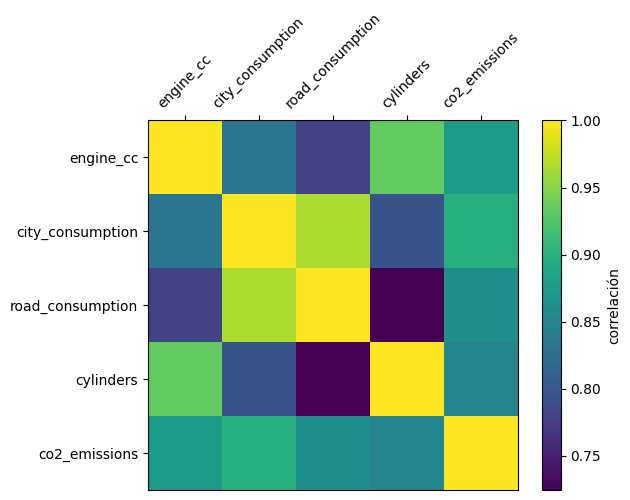

In [80]:
column_names = ['engine_cc', 'city_consumption', 'road_consumption', 'cylinders', 'co2_emissions']

#plt.imshow(matriz, cmap='inferno')
#plt.imshow(matriz)
#plt.imshow(matriz, cmap='viridis', vmin=-1, vmax=1)
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='correlación')
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position('top')




<Axes: >

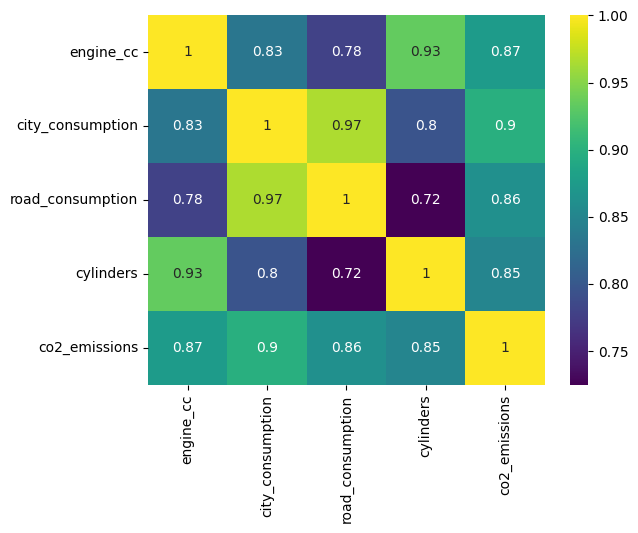

In [84]:
# pip install seaborn
import seaborn as sns
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names)


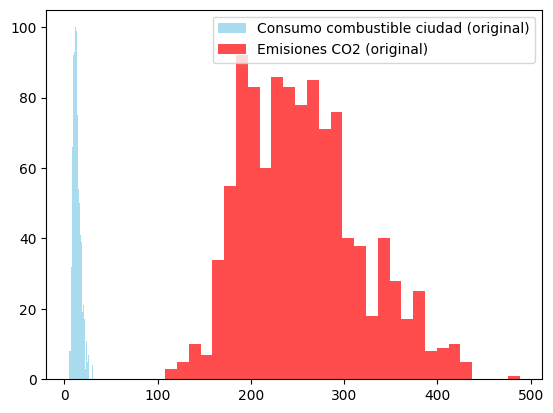

In [89]:
# plt.figure(figsize = (12, 10))

plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)");
plt.hist(co2_emissions, bins=30, color="red", alpha=0.7, label="Emisiones CO2 (original)")
plt.legend();





In [122]:
# estandarizar y volver a pintar el histograma
mean_city_consumption = np.mean(city_consumption)
mean_co2_emissions = np.mean(co2_emissions)

median_city_consumption = np.median(city_consumption)
median_co2_emissions = np.median(co2_emissions)

std_city_consumption = np.std(city_consumption)
std_co2_emissions = np.std(co2_emissions)



print(f"Media original city_consumption: {mean_city_consumption}")
print(f"Mediana original city_consumption: {median_city_consumption}")
print(f"Desviación estandar original city_consumptions: {std_city_consumption}")

print(f"Media original co2_emissions: {mean_co2_emissions}")
print(f"Mediana original co2_emisiions: {median_co2_emissions}")
print(f"Desviación estandar original co2_emissions: {std_co2_emissions}")


#print(f"Moda: {stats.mode(sample)[0]}")

#print(f"std: {np.std(sample)}")
#plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)")
#plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
#plt.legend();

Media original city_consumption: 13.29653263092041
Mediana original city_consumption: 12.600000381469727
Desviación estandar original city_consumptions: 4.099331378936768
Media original co2_emissions: 256.2286682128906
Mediana original co2_emisiions: 251.0
Desviación estandar original co2_emissions: 63.34259796142578


In [123]:
city_consumption_standard = (city_consumption - mean_city_consumption) / std_city_consumption
co2_emissions_standard = (co2_emissions - mean_co2_emissions) / std_co2_emissions

print(city_consumption_standard[:5]) #mostramos los 5 primeros valores
print(co2_emissions_standard[:5])


[-0.8285578  -0.5114329  -1.7799324  -0.14551954 -0.29188472]
[-0.9508399  -0.55616075 -1.8980697  -0.01939719 -0.19305599]


In [124]:
# estandarizar y volver a pintar el histograma
mean_city_consumption = np.mean(city_consumption_standard)
mean_co2_emissions = np.mean(co2_emissions_standard)

median_city_consumption = np.median(city_consumption_standard)
median_co2_emissions = np.median(co2_emissions_standard)

std_city_consumption = np.std(city_consumption_standard)
std_co2_emissions = np.std(co2_emissions_standard)



print(f"Media estandarizado city_consumption: {mean_city_consumption}")
print(f"Mediana estandarizado city_consumption: {median_city_consumption}")
print(f"Desviación estandarizado original city_consumptions: {std_city_consumption}")

print(f"Media estandarizado co2_emissions: {mean_co2_emissions}")
print(f"Mediana estandarizado co2_emisiions: {median_co2_emissions}")
print(f"Desviación estandarizado original co2_emissions: {std_co2_emissions}")


#print(f"Moda: {stats.mode(sample)[0]}")

#print(f"std: {np.std(sample)}")
#plt.hist(city_consumption, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (original)")
#plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
#plt.legend();

Media estandarizado city_consumption: -7.150323000360004e-08
Mediana estandarizado city_consumption: -0.1699136197566986
Desviación estandarizado original city_consumptions: 0.9999999403953552
Media estandarizado co2_emissions: 1.6445743256099377e-07
Mediana estandarizado co2_emisiions: -0.08254584670066833
Desviación estandarizado original co2_emissions: 1.0


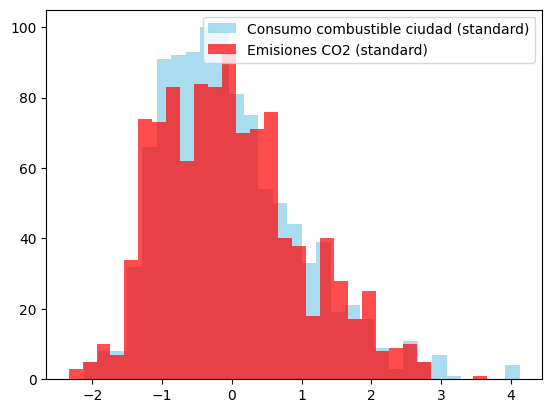

In [126]:

plt.hist(city_consumption_standard, bins=30, color="skyblue", alpha=0.7, label="Consumo combustible ciudad (standard)");
plt.hist(co2_emissions_standard, bins=30, color="red", alpha=0.7, label="Emisiones CO2 (standard)")
plt.legend();

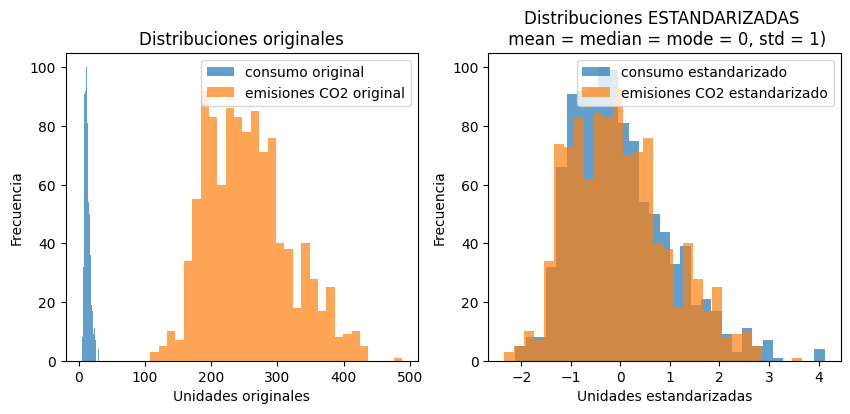

In [135]:
# opcional: mostrar los dos gráficos juntos
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1) # Primer gráfico
plt.hist(city_consumption, bins=30, alpha=0.7, label='consumo original')
plt.hist(co2_emissions, bins=30, alpha=0.7, label='emisiones CO2 original')
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1,2,2) # Segundo gráfico
plt.hist(city_consumption_standard, bins=30, alpha=0.7, label='consumo estandarizado')
plt.hist(co2_emissions_standard, bins=30, alpha=0.7, label='emisiones CO2 estandarizado')
plt.title("Distribuciones ESTANDARIZADAS \n mean = median = mode = 0, std = 1)")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend();


In [113]:
def normaliza(vector):
    vector_norm = [vector]
    media = np.mean(vector)
    std = np.std(vector)
    vector_norm = [(vector - media) / std ]  # for x in vector] con Numpy no necesitamos el for, porque ya trabaja la matriz elemento a elemento

vector = city_consumption
print(np.array(vector_norm))

NameError: name 'vector_norm' is not defined

In [ ]:
columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emissions] # 5 columnas del CSV que pasamos a un array

matriz_lista = list()

# podemos hacer un for para interrelacionar las columnas, o usar pandas
for columna1 in columnas:
    
    fila = list()
    
    for columna2 in columnas:
        
        fila.append(stats.pearsonr(columna1, columna2)[0])
        
    matriz_lista.append(fila)
     
print(matriz_lista)    
matriz = np.array(matriz_lista)
print(matriz) 
   

    


In [ ]:
plt.figure(figsize = (8, 5))

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black")

# Curva Original
sns.kdeplot(sample, color = "red", label = "Original")

# Curva Estandarizada
sns.kdeplot(resultados_estandar, color = "blue", label = "Estandar")

plt.legend()
plt.grid()
plt.show()